##Importar módulos

In [1]:
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import np_utils                         
from tensorflow import keras

##Verificar que se esta trabajando con la GPU

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

##Descargar dataset CIFAR10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)


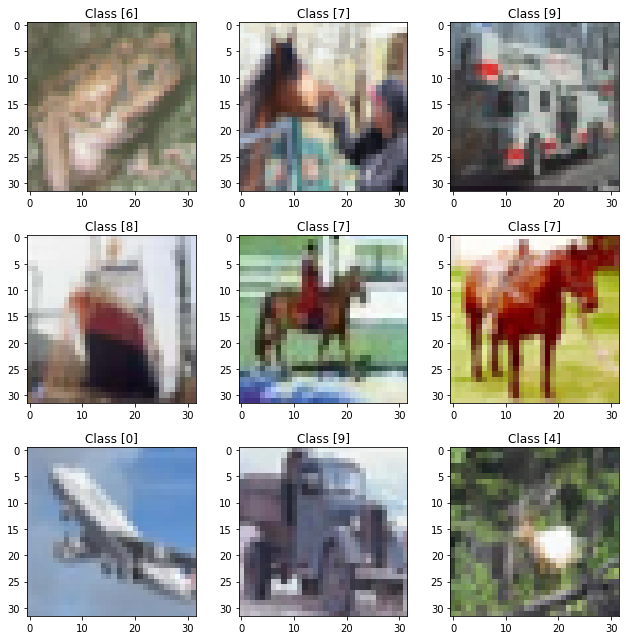

In [4]:
import random 

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num])
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [5]:
print(x_train[10])

[[[53 65 53]
  [54 63 52]
  [56 60 50]
  ...
  [47 51 50]
  [41 45 44]
  [24 28 27]]

 [[46 59 41]
  [53 62 45]
  [54 59 44]
  ...
  [42 46 45]
  [39 43 42]
  [28 32 31]]

 [[45 59 38]
  [50 60 41]
  [46 52 34]
  ...
  [38 42 41]
  [36 40 39]
  [29 33 32]]

 ...

 [[71 83 66]
  [74 83 66]
  [80 85 67]
  ...
  [51 54 33]
  [46 49 34]
  [49 50 41]]

 [[75 82 67]
  [79 85 69]
  [81 85 67]
  ...
  [61 65 41]
  [64 67 48]
  [48 50 41]]

 [[85 83 71]
  [85 84 71]
  [86 86 70]
  ...
  [61 65 39]
  [64 67 46]
  [49 50 41]]]


## Normalización y vector categórico

In [6]:
# Normalización de las imágenes
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train = x_train / 255.0
x_test = x_test / 255.0

print(y_train)

# Codificación one hot 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [7]:
# Verificación de las dimesiones de los datos de entrenamiento. Note que al ser 
# imágenes a color se tienen 3 canales
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


##Definir la arquitectura de la red CNN

In [8]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(8, (3, 3),padding='same' ,input_shape=(32, 32, 3)))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Conv2D(16, (3, 3), padding='same'))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(32, (3, 3),padding='same'))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(10, activation='softmax'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 16)        0

In [9]:
# Compilación del modelo
modelo.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])


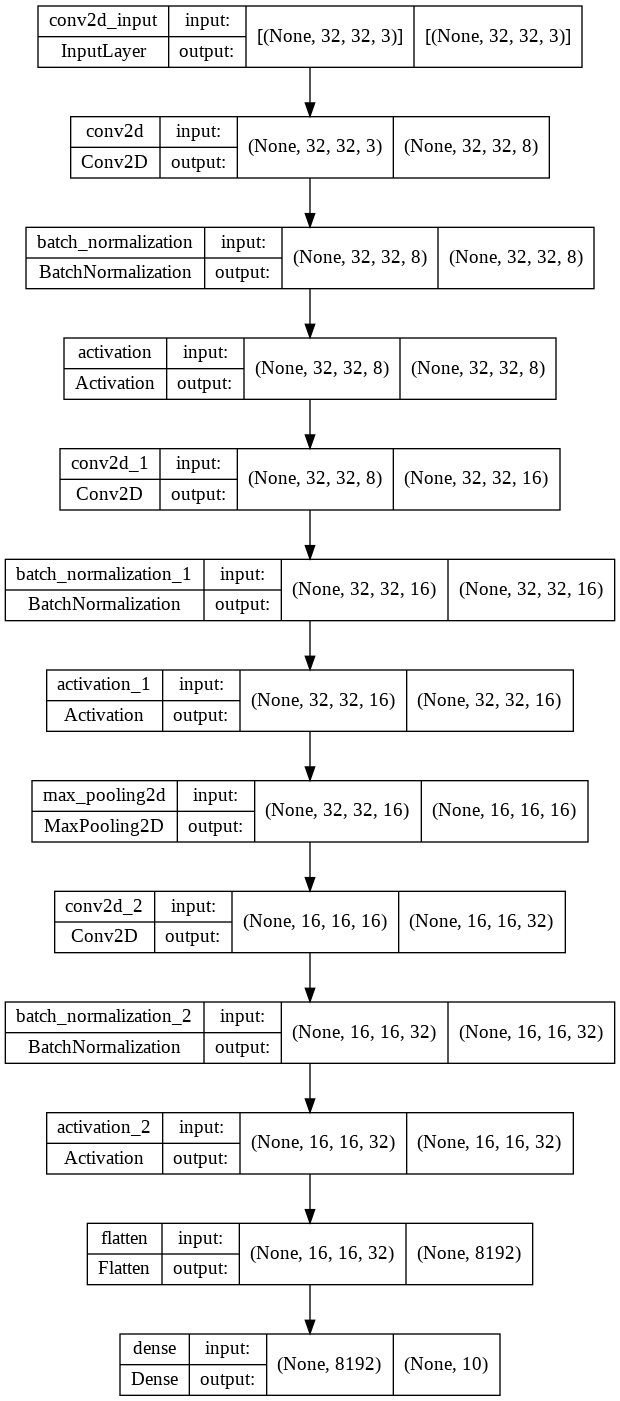

In [10]:
tf.keras.utils.plot_model(modelo, to_file='model_plot.png',
                          show_shapes=True, show_layer_names=True)

In [11]:
print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 10)
(50000, 32, 32, 3)
(50000, 10)


##Entrenar modelo

In [12]:
print(x_train.shape)
history = modelo.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=32, verbose=0, shuffle=True)

(50000, 32, 32, 3)


##Graficar evolución del modelo

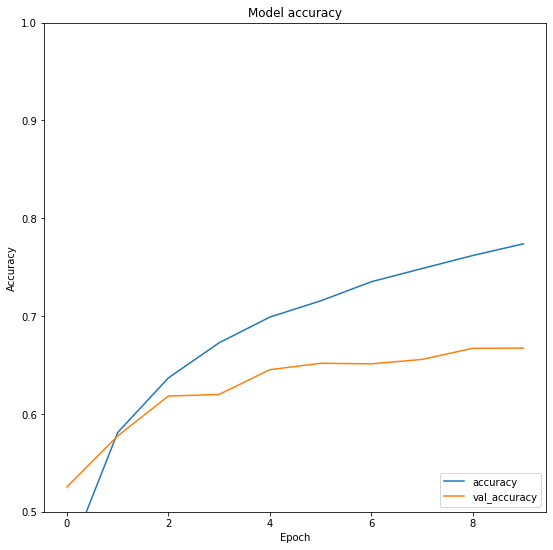

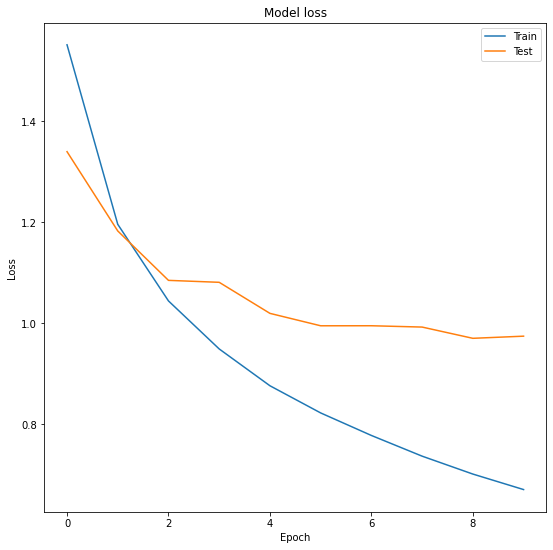

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [14]:
# Evaluación del modelo
Score = modelo.evaluate(x_test, y_test, verbose=0)[1]

print(np.round(Score,decimals=4))

outputTrain=modelo.predict(x_test)

0.6673


In [15]:
# Predicción de las salidas del modelo con los datos de prueba
predicted_classes_Temp = modelo.predict(x_test)
predicted_classes =np.argmax(predicted_classes_Temp, axis=1)
real_classes =np.argmax(y_test, axis=1)
correct_indices = np.nonzero(predicted_classes == real_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != real_classes)[0]

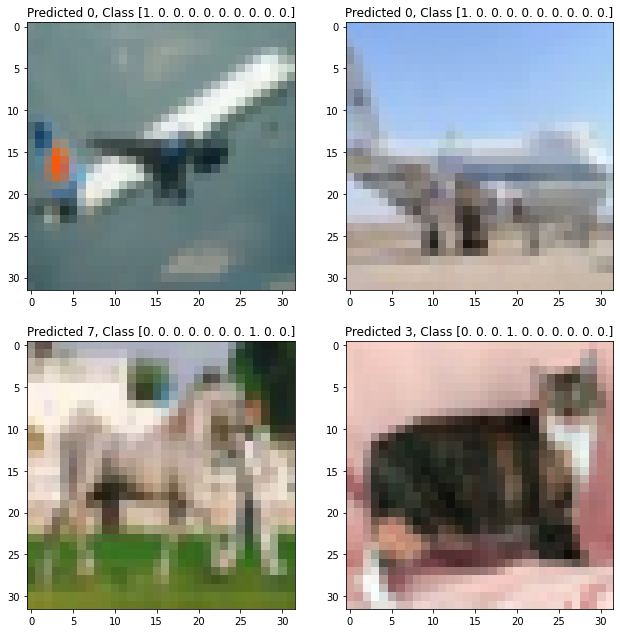

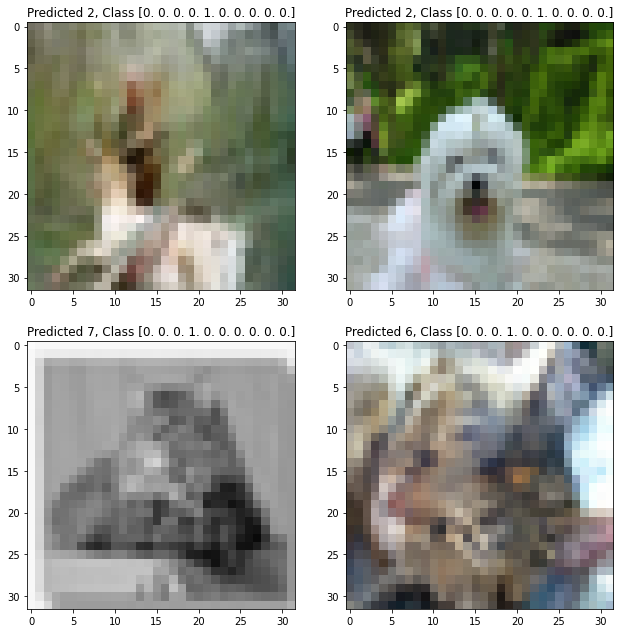

In [16]:
# Graficación de imágenes de prueba con clasificación correcta e incorrecta
plt.figure()
Indices_Correctos=np.random.permutation(6495)
for i, correct in enumerate(correct_indices[Indices_Correctos[:4]]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[correct])
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

Indices_Incorrectos=np.random.permutation(3539)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[Indices_Incorrectos[:4]]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[incorrect])
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

##Matriz de confusión 

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1000
           1       0.81      0.73      0.77      1000
           2       0.58      0.53      0.55      1000
           3       0.54      0.40      0.46      1000
           4       0.56      0.67      0.61      1000
           5       0.61      0.57      0.59      1000
           6       0.74      0.74      0.74      1000
           7       0.67      0.75      0.71      1000
           8       0.68      0.85      0.76      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000

[[665  16  59  12  25   2  13  16 144  48]
 [ 33 735   8  11   6   5   9   5  64 124]
 [ 61   8 531  40 141  62  68  58  23   8]
 [ 23  17  79 395  97 184  78  67  41  19]
 [ 20   5  72  50 665  31  47  83  23   4]
 [ 16   4  61 126  70 574 

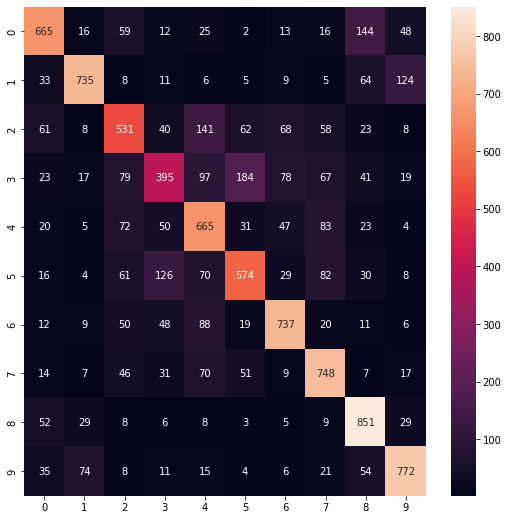

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

y_test_class = np.argmax(y_test,axis=1) 
y_pred_class = np.argmax(outputTrain,axis=1) 

# Cálculo de las métricas 
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# Visualización de la matriz de confusion en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [18]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [19]:
# Se guarda el modelo en formato Keras
modelo.save('cifar_10_model.h5')

In [20]:
# Se guarda el modelo en formato TensorFlow
modelo.save('cifar_10_model')

In [21]:
# Se convierte el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [22]:
modelo_tflite = converter.convert()

In [23]:
# Se guarda el modelo 
open("/content/cifar10.tflite","wb").write(modelo_tflite)

355244

In [24]:
#  Probar el modelo p
interpreter = tf.lite.Interpreter("/content/cifar10.tflite")

In [25]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
input_details

[{'name': 'serving_default_conv2d_input:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  3], dtype=int32),
  'shape_signature': array([-1, 32, 32,  3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [27]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 16,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [28]:
def set_input_tensor(interpreter, image):
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

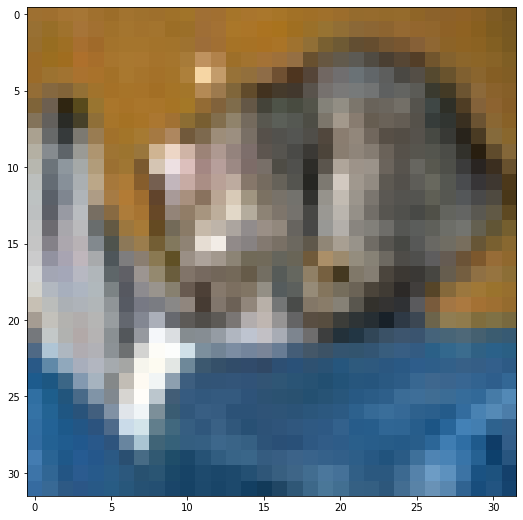

In [29]:
image = x_test[0]
plt.imshow(image);

In [30]:
set_input_tensor(interpreter, image) 
interpreter.invoke()
output_details = interpreter.get_output_details()[0]

In [31]:
salida=interpreter.get_tensor(output_details['index'])
print(salida)

[[6.3859590e-04 3.8713446e-05 3.0276612e-03 3.5399830e-01 4.2294158e-04
  5.8749975e-03 7.5915325e-03 1.7751221e-05 6.2835020e-01 3.9372026e-05]]


In [32]:
img_pred = np.argmax(salida)
print(img_pred)

8


In [33]:
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [34]:
salida[0,img_pred]

0.6283502

In [35]:
EntradaPrueba=np.zeros((1,32,32,3))
EntradaPrueba[0,:,:,:]=image
Salidaprueba=modelo.predict(EntradaPrueba)


In [36]:
ImagenPrueba=np.zeros((1,32,32,3))
ImagenPrueba[0,:,:,:]=x_test[0]
prediccion = modelo.predict(ImagenPrueba)
print(prediccion)
img_pred = np.argmax(prediccion)
print(img_pred)
print(prediccion[0,img_pred])

[[6.3859887e-04 3.8712999e-05 3.0276524e-03 3.5399887e-01 4.2294088e-04
  5.8750310e-03 7.5915419e-03 1.7751338e-05 6.2834948e-01 3.9371909e-05]]
8
0.6283495


In [37]:
# Se convierte el modelo a TensorFlow Lite con Cuantización
converter2 = tf.lite.TFLiteConverter.from_keras_model(modelo)
#tf.lite.Optimize.Default
#tf.lite.Optimize.OPTIMIZE_FOR_SIZE
#tf.lite.Optimize.OPTIMIZE_FOR_LATENCY

converter2.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter2.convert()


In [38]:
# Se guarda el modelo de Tflite cuantizado
open("/content/cifar10_quant.tflite","wb").write(tflite_quant_model)

93336

In [39]:
interpreter2 = tf.lite.Interpreter("/content/cifar10_quant.tflite")

In [40]:
interpreter2.allocate_tensors()
input_details2 = interpreter2.get_input_details()
output_details2 = interpreter2.get_output_details()

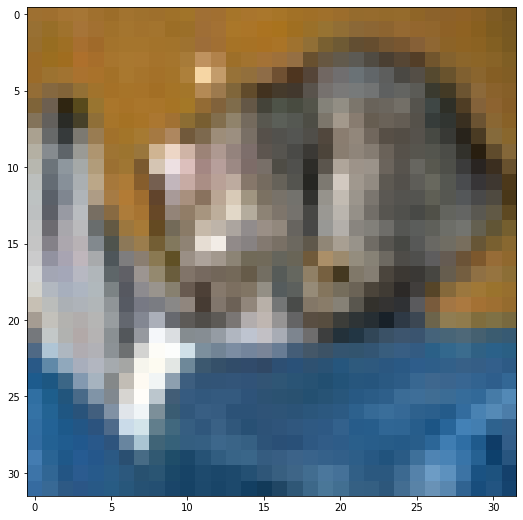

In [41]:
image2 =x_test[0]
plt.imshow(image2);



In [42]:
set_input_tensor(interpreter2, image2) 
interpreter2.invoke()
output_details2 = interpreter2.get_output_details()[0]

In [43]:
interpreter2.get_tensor(output_details['index'])

array([[6.5214920e-04, 4.1676372e-05, 3.1873491e-03, 3.6375165e-01,
        4.0020540e-04, 6.5813572e-03, 7.0631295e-03, 1.7653350e-05,
        6.1826688e-01, 3.7940506e-05]], dtype=float32)

In [44]:
#output2 = np.squeeze(interpreter2.get_tensor(output_details['index']))
salida2=interpreter2.get_tensor(output_details['index'])
print(salida2)

[[6.5214920e-04 4.1676372e-05 3.1873491e-03 3.6375165e-01 4.0020540e-04
  6.5813572e-03 7.0631295e-03 1.7653350e-05 6.1826688e-01 3.7940506e-05]]


In [45]:
img_pred2 = np.argmax(salida2)
print(img_pred2)


8


In [46]:
salida2[0,img_pred2]

0.6182669

In [47]:
# Se convierte el modelo a TensorFlow Lite con Cuantización
converter3 = tf.lite.TFLiteConverter.from_keras_model(modelo)
#tf.lite.Optimize.Default
#tf.lite.Optimize.OPTIMIZE_FOR_SIZE
#tf.lite.Optimize.OPTIMIZE_FOR_LATENCY

converter3.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model_3 = converter3.convert()


In [48]:
# Se guarda el modelo de Tflite cuantizado
open("/content/cifar10_quant_Size.tflite","wb").write(tflite_quant_model_3)

93336

In [50]:
# Se convierte el modelo a TensorFlow Lite con Cuantización
converter4 = tf.lite.TFLiteConverter.from_keras_model(modelo)
#tf.lite.Optimize.Default
#tf.lite.Optimize.OPTIMIZE_FOR_SIZE
#tf.lite.Optimize.OPTIMIZE_FOR_LATENCY

converter4.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
tflite_quant_model_4 = converter4.convert()

# Se guarda el modelo de Tflite cuantizado
open("/content/cifar10_quant_Latency.tflite","wb").write(tflite_quant_model_4)

93336

In [51]:
converter5 = tf.lite.TFLiteConverter.from_keras_model(modelo)
#converter5 = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter5.optimizations = [tf.lite.Optimize.DEFAULT]
converter5.target_spec.supported_types = [tf.float16]
tflite_quant_model_5 = converter5.convert()
# Se guarda el modelo de Tflite cuantizado
open("/content/cifar10_float16.tflite","wb").write(tflite_quant_model_5)

180656

In [52]:
interpreter5 = tf.lite.Interpreter("/content/cifar10_float16.tflite")

In [53]:
interpreter5.allocate_tensors()
input_details5 = interpreter5.get_input_details()
output_details5 = interpreter5.get_output_details()

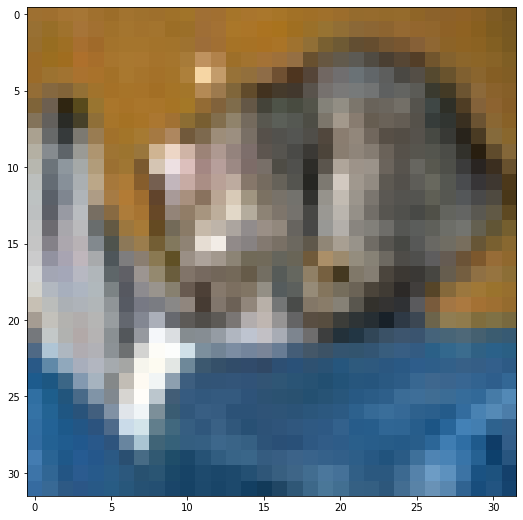

In [55]:
image5 =x_test[0]
plt.imshow(image5);

In [56]:
set_input_tensor(interpreter5, image5) 
interpreter5.invoke()
output_details5 = interpreter5.get_output_details()[0]

In [57]:
salida5=interpreter5.get_tensor(output_details5['index'])
print(salida5)

[[6.3652452e-04 3.8777325e-05 3.0353190e-03 3.5418305e-01 4.2311332e-04
  5.9077181e-03 7.5681601e-03 1.7925538e-05 6.2814993e-01 3.9454710e-05]]


In [58]:
img_pred5 = np.argmax(salida5)
print(img_pred5)

8


In [59]:
salida5[0,img_pred5]

0.6281499